# Importing files


In [1]:
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import cv2
import pywt
import os
import sys
import shutil
import seaborn as sns
from PIL import Image
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
from prettytable import PrettyTable

# EDA 

In [2]:
photo1 = cv2.imread('Img1.jpg')

In [3]:
print("Shape of Photo 1 is:",photo1.shape)

Shape of Photo 1 is: (1390, 1140, 3)


Showing Photo number 1:


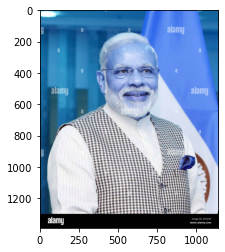

In [4]:
print("Showing Photo number 1:")
plt.imshow(photo1)

In [5]:
print(type(photo1))

<class 'numpy.ndarray'>


In [6]:
print(photo1.shape)

(1390, 1140, 3)


In [9]:
print(photo1.shape[0])

1390


In [10]:
print(photo1.shape[1])

1140


In [11]:
print(photo1.ndim)

3


In [12]:
print(photo1.size)

4753800


In [13]:
print(photo1.max())

255


In [14]:
print(photo1.min())

0


In [15]:
print(photo1[100,50,0])

24


In [16]:
print(photo1[100,50,1])

89


In [17]:
print(photo1[100,50,2])

144


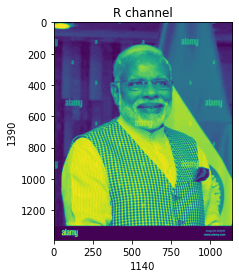

In [18]:
plt.title("R channel")
plt.ylabel(photo1.shape[0])
plt.xlabel(photo1.shape[1])
plt.imshow(photo1[:,:,0])
plt.show()

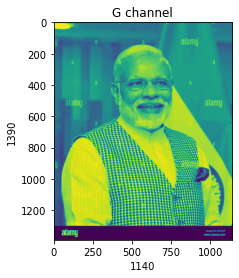

In [19]:
plt.title("G channel")
plt.ylabel(photo1.shape[0])
plt.xlabel(photo1.shape[1])
plt.imshow(photo1[:,:,1])
plt.show()

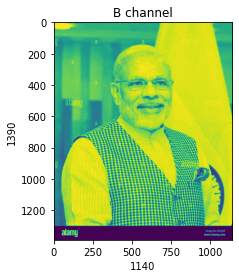

In [20]:
plt.title("B channel")
plt.ylabel(photo1.shape[0])
plt.xlabel(photo1.shape[1])
plt.imshow(photo1[:,:,2])
plt.show()

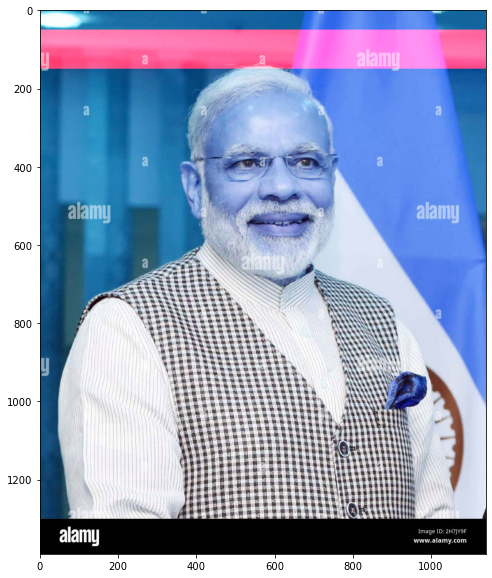

In [23]:
photo1[50:150,:,0] = 255
plt.figure(figsize = (10,10))
plt.imshow(photo1)
plt.show()

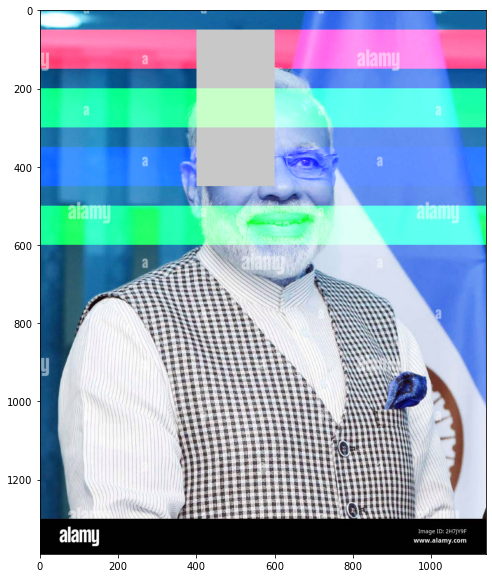

In [30]:
photo1[200:300,:,1] = 255
plt.figure(figsize = (10,10))
plt.imshow(photo1)
plt.show()

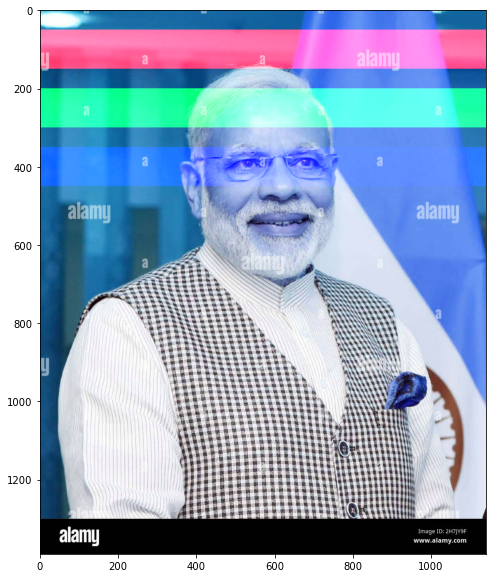

In [25]:
photo1[350:450,:,2] = 255
plt.figure(figsize = (10,10))
plt.imshow(photo1)
plt.show()

In [231]:
gphoto1 = cv2.cvtColor(photo1, cv2.COLOR_BGR2GRAY)

In [232]:
print("Shape of Gray image 1:",gphoto1.shape)

Shape of Gray image 1: (1390, 1140)


Showing Gray Photo number 1:


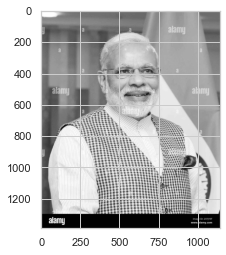

In [233]:
print("Showing Gray Photo number 1:")
plt.imshow(gphoto1, cmap='gray')

# Face Eye and Smile detection

In [234]:
face_c = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_c = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_c = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')
detected_face = face_c.detectMultiScale(gphoto1, 1.3, 5)

In [235]:
print("Representation of detected face array:",detected_face)

Representation of detected face array: [[421 239 394 394]]


In [236]:
(x,y,a,b) = detected_face[0]
print("Dimensions of detected face array : ",x,y,a,b)

Dimensions of detected face array :  421 239 394 394


Detection of face using rectangle :


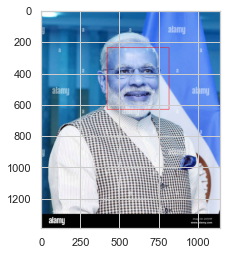

In [237]:
print("Detection of face using rectangle :")
face_photo1 = cv2.rectangle(photo1,(x,y),(x+a,y+b),(255,0,0),2)
plt.imshow(face_photo1)

In [238]:
cv2.destroyAllWindows()
for (x,y,a,b) in detected_face:
    face_photo = cv2.rectangle(photo1,(x,y),(x+a,y+b),(255,0,0),2)
    roi_color = face_photo[y:y+b, x:x+a]
    roi_gray = gphoto1[y:y+b, x:x+a]
    eyes = eye_c.detectMultiScale(roi_gray)
    for (ex,ey,ea,eb) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ea,ey+eb),(0,255,0),2)
    smile = smile_c.detectMultiScale(roi_gray,1.8,20)
    for (sx,sy,sa,sb) in smile:
        cv2.rectangle(roi_color,(sx,sy),(sx+sa,sy+sb),(0,255,0),2)

Detecting eyes , smile and face on Photo 1:


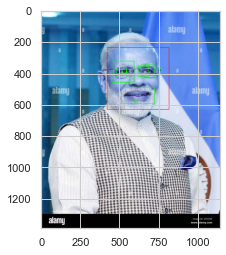

In [239]:
print("Detecting eyes , smile and face on Photo 1:")
plt.figure()
plt.imshow(face_photo, cmap='gray')
plt.show()

Showing Coloured Photo 1 with eyes and smile :


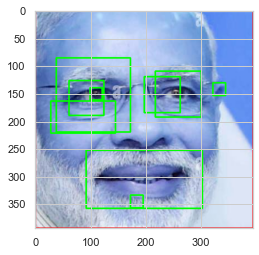

In [240]:
print("Showing Coloured Photo 1 with eyes and smile :")
plt.imshow(roi_color, cmap='gray')

In [241]:
print(len(eyes))
print(len(smile))

7
2


# Cropping Images 

In [242]:
photo2 = cv2.imread('Img3.jpg')

Showing Photo 2:


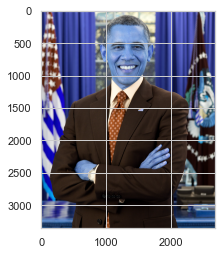

In [243]:
print("Showing Photo 2:")
plt.imshow(photo2)

In [244]:
def cropped_image(photo_path):
    photo2 = cv2.imread(photo_path)
    if(photo2 is not None):
        gphoto2 = cv2.cvtColor(photo2, cv2.COLOR_BGR2GRAY)
        faces = face_c.detectMultiScale(gphoto2, 1.3, 5)
        return helper(photo2,gphoto2,faces)

In [245]:
def helper(photo2,gphoto2,faces):
    for (x,y,a,b) in faces:
            roi_color = photo2[y:y+b, x:x+a]
            roi_gray = gphoto2[y:y+b, x:x+a]
            eyes = eye_c.detectMultiScale(roi_gray)
            smile = smile_c.detectMultiScale(roi_gray,1.8,20)
            if len(eyes) >= 2 and len(smile) >= 1:
                return roi_color

In [246]:
cimage = cropped_image('Img3.jpg')

Showing Cropped Photo 2:


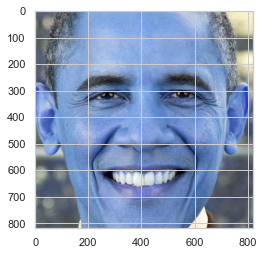

In [247]:
print("Showing Cropped Photo 2:")
plt.imshow(cimage)

In [248]:
photo3 = cv2.imread('Img4.jpg')

Showing Photo 3 :


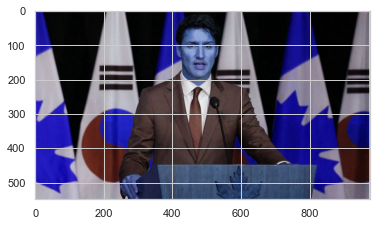

In [249]:
print("Showing Photo 3 :")
plt.imshow(photo3)

In [250]:
cimage2 = cropped_image('Img4.jpg')

In [251]:
if type(cimage2) != 'float':
    print("Image can not be cropped because eye smile or face can not be detected")
else:
    print("Showing Cropped Photo 3 :")
    plt.imshow(cimage2)

Image can not be cropped because eye smile or face can not be detected


# Reading Images from Directory

In [252]:
source = "./project/"

In [253]:
destination = "./project/new/"

In [254]:
path_of_dir = []

In [255]:
File_name = {}
new_photo_loc = []

In [256]:
for i in os.scandir(source):
    if i.is_dir():
        path_of_dir.append(i.path)

In [257]:
print("path of all the directories are : ")
print(path_of_dir)

path of all the directories are : 
['./project/barack_obama', './project/donald_trump', './project/joe_biden', './project/justin_trudeau', './project/narendra_modi', './project/rishi_sunak', './project/valdimir_putin', './project/xi_jinping']


In [258]:
for i in path_of_dir:
    count = 1
    politician_name = i.split('/')[-1]
    File_name[politician_name] = []

In [259]:
print(File_name)

{'barack_obama': [], 'donald_trump': [], 'joe_biden': [], 'justin_trudeau': [], 'narendra_modi': [], 'rishi_sunak': [], 'valdimir_putin': [], 'xi_jinping': []}


In [260]:
if os.path.exists(destination):
     shutil.rmtree(destination)

In [261]:
os.mkdir(destination)

# Storing Cropped Images

In [262]:
def set_image1():
    for i in path_of_dir:
        count = 1
        politician_name = i.split('/')[-1]
        File_name[politician_name] = []
        set_image2(count,politician_name,i)

In [263]:
def set_image2(count,politician_name,i):
        for j in os.scandir(i):
            roi_color = cropped_image(j.path)
            if roi_color is not None:
                cfolder = destination + politician_name
                if not os.path.exists(cfolder):
                    os.makedirs(cfolder)
                    new_photo_loc.append(cfolder)
                cropped_file_name = politician_name + str(count) + ".png"
                cropped_file_path = cfolder + "/" + cropped_file_name 

                cv2.imwrite(cropped_file_path, roi_color)
                File_name[politician_name].append(cropped_file_path)
                count += 1  

In [264]:
set_image1()

In [265]:
def classify(classification):
    count = 0
    for politician_name in File_name.keys():
        classification[politician_name] = count
        count = count + 1
    return classification

In [266]:
classification = {}
print("Classification of all Politicians : ")
print(classify(classification))

Classification of all Politicians : 
{'barack_obama': 0, 'donald_trump': 1, 'joe_biden': 2, 'justin_trudeau': 3, 'narendra_modi': 4, 'rishi_sunak': 5, 'valdimir_putin': 6, 'xi_jinping': 7}


In [267]:
for politician_name in File_name.keys():
    print(classification[politician_name])

0
1
2
3
4
5
6
7


# Data Augmentation for Process 1

In [268]:
r1 = imread("Img1.jpg")
r90 = cv2.rotate(r1,cv2.ROTATE_90_CLOCKWISE)

Showing Photo number 1:


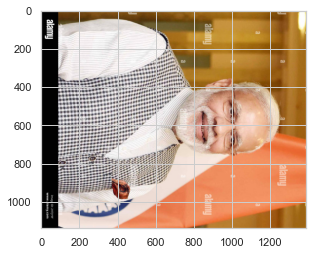

In [269]:
print("Showing Photo number 1:")
plt.imshow(r90)

In [270]:
f1 = imread("Img1.jpg")
f1_ = cv2.flip(f1,-1)

Showing Photo number 1:


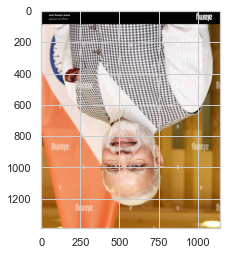

In [271]:
print("Showing Photo number 1:")
plt.imshow(f1_)

In [272]:
source = "./project/new/"

In [273]:
name_of_dir = []

In [274]:
for i in os.scandir(source):
    if i.is_dir():
        name_of_dir.append(i.path)

In [275]:
name_of_file = {}

In [276]:
for i in name_of_dir:
    count = 1
    politician_name = i.split('/')[-1]
    name_of_file[politician_name] = []

In [277]:
count = 1
rotate_img = []
flip_img = []
target_rotate = []
target_flip = []

In [278]:
def rotate(count,politician_name,i):
        for j in os.listdir(i):
            path_1 = f'C:/users/HP/Downloads/project/new/{politician_name}/{j}'
            #print(path_1)
            image = cv2.imread(path_1)
            image = resize(image,(150,150,3))
            rotate_90 = cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
            rotate_90 = np.array(rotate_90)
            rotate_img.append(rotate_90.flatten())
            target_rotate.append(classification[politician_name])

In [279]:
def flip(count,politician_name,i):
        for j in os.listdir(i):
            path_1 = f'C:/users/HP/Downloads/project/new/{politician_name}/{j}'
            #print(path_1)
            image = cv2.imread(path_1)
            image = resize(image,(150,150,3))
            flip_i = cv2.flip(image,-1)
            flip_i = np.array(flip_i)
            flip_img.append(flip_i.flatten())
            target_flip.append(classification[politician_name])

In [280]:
for i in name_of_dir:
    count = 1
    politician_name = i.split('/')[-1]
    name_of_file[politician_name] = []
    rotate(count,politician_name,i)
    flip(count,politician_name,i)

In [281]:
flip_img = np.array(flip_img)
flip_img.shape

(186, 67500)

In [282]:
rotate_img = np.array(rotate_img)
print(rotate_img.shape)

(186, 67500)


In [283]:
flat_data_arr=[] #input array
target_arr=[] #output array

In [284]:
for politician_name in File_name.keys():
    path = os.path.join(source,politician_name)
    for i in os.listdir(path):
        path_1 = f'C:/users/HP/Downloads/project/new/{politician_name}/{i}'
        #print(path_1)
        img_array = imread(path_1)
        img_resized = resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(classification[politician_name])

In [285]:
flat_data_arr = np.array(flat_data_arr)

In [286]:
print(flat_data_arr.shape)

(186, 67500)


In [287]:
flat_data_arr = np.vstack([rotate_img,flat_data_arr])
flat_data_arr = np.vstack([flip_img,flat_data_arr])

In [288]:
print(flat_data_arr.shape)

(558, 67500)


In [289]:
flat_data = np.array(flat_data_arr)
target_type1 = np.array(target_arr)
df = pd.DataFrame(flat_data)
df_type1=df.iloc[:,:-1] 

In [290]:
df_type1.shape

(558, 67499)

In [291]:
target_type1 = np.array(target_type1)
target_flip = np.array(target_flip)
target_rotate = np.array(target_rotate)

In [292]:
target_type1 = np.concatenate([target_flip,target_type1])
target_type1 = np.concatenate([target_rotate,target_type1])

In [293]:
target_type1.shape

(558,)

In [294]:
scaler = StandardScaler()
df_type1 = scaler.fit_transform(df_type1)

# Data Augmentation Process 2

In [295]:
r1 = imread("Img3.jpg")
r90 = cv2.rotate(r1,cv2.ROTATE_90_CLOCKWISE)

Showing Photo number 2:


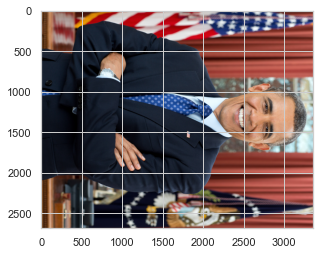

In [296]:
print("Showing Photo number 2:")
plt.imshow(r90)

In [297]:
f1 = imread("Img3.jpg")
f1_ = cv2.flip(f1,-1)

Showing Photo number 2:


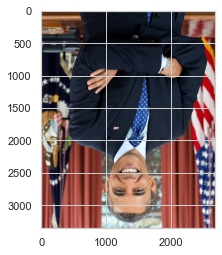

In [298]:
print("Showing Photo number 2:")
plt.imshow(f1_)

In [299]:
target_a = []
flip_d = []
rotate_d = []
target_f_d = []
target_r_d = []

In [300]:
img2 = cv2.imread('Img2.jpeg',cv2.IMREAD_GRAYSCALE)
img_data = cv2.resize(img2,(28,28),interpolation=cv2.INTER_LINEAR)
img_data = cv2.bitwise_not(img_data)
img_data = pd.DataFrame(img_data)
img_data = img_data.values.flatten()

In [301]:
for politician_name in File_name.keys():
    path1=os.path.join(destination,politician_name)
    for i in os.listdir(path1):
        img_array=cv2.imread(os.path.join(path1,i),cv2.IMREAD_GRAYSCALE)
        if np.any(img_array):
            img_resize = cv2.resize(img_array,(28,28),interpolation=cv2.INTER_LINEAR)
            
            flip_im = cv2.flip(img_resize,-1)
            flip_im = cv2.bitwise_not(flip_im)
            flip_im = pd.DataFrame(flip_im)
            flip_im = flip_im.values.flatten()
            flip_d.append(flip_im)
            
            rotate_im = cv2.rotate(img_resize,cv2.ROTATE_90_CLOCKWISE)
            rotate_im = cv2.bitwise_not(rotate_im)
            rotate_im = pd.DataFrame(rotate_im)
            rotate_im = rotate_im.values.flatten()
            rotate_d.append(rotate_im)
            
            img_resize = cv2.bitwise_not(img_resize)
            img_resize = pd.DataFrame(img_resize)
            img_resize = img_resize.values.flatten()
            img_data = np.vstack([img_resize,img_data])
            
            target_a.append(classification[politician_name])
            target_f_d.append(classification[politician_name])
            target_r_d.append(classification[politician_name])

In [302]:
img_data.shape

(187, 784)

In [303]:
target_type2 = np.array(target_a)

In [304]:
img_data = np.vstack([rotate_d,img_data])
img_data = np.vstack([flip_d,img_data])

In [305]:
img_data = np.delete(img_data,(0),axis=0)

In [306]:
img_data = np.array(img_data)

In [307]:
img_data.shape

(558, 784)

In [308]:
target_type2 = np.array(target_type2)
target_flip = np.array(target_flip)
target_rotate = np.array(target_rotate)

In [309]:
target_type2 = np.concatenate([target_flip,target_type2])
target_type2 = np.concatenate([target_rotate,target_type2])

In [310]:
target_type2.shape

(558,)

In [311]:
print(len(np.unique(target_type2)))

8


In [312]:
df_type2 = img_data

# Data Augmentation Process 3


In [313]:
def wavel(photo, mode='haar', level=1):
    Array1 = photo
    Array1 = cv2.cvtColor( Array1,cv2.COLOR_RGB2GRAY )
    Array1 = np.float32(Array1)   
    Array1 = Array1/255;
    return help(Array1 , mode , level)

In [314]:
def help(Array1, mode = 'haar', level=1):
    coef = pywt.wavedec2(Array1, mode, level=level)
    coef_H = list(coef)  
    coef_H[0] *= 0;  
    Array1_H = pywt.waverec2(coef_H, mode);
    Array1_H *= 255;
    Array1_H =  np.uint8(Array1_H)
    return Array1_H

In [315]:
wavel_photo = wavel(cimage,'db1',5)

Showing modified Photo :


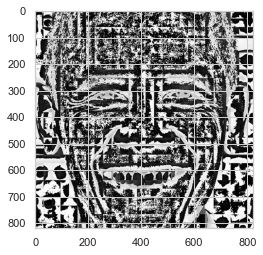

In [316]:
print("Showing modified Photo :")
plt.imshow(wavel_photo, cmap='gray')

In [317]:
df_type3 = []
target_type3 = []

In [318]:
for politician_name, i in File_name.items():
    for j in i:
        target_type3.append(classification[politician_name])

In [319]:
for politician_name, i in File_name.items():
    for j in i:
        photo = cv2.imread(j)
        scal_photo = cv2.resize(photo, (32, 32))
        photo_har = wavel(photo,'db1',5)
        scal_photo_har = cv2.resize(photo_har, (32, 32))
        combined_img = np.vstack((scal_photo.reshape(32*32*3,1),scal_photo_har.reshape(32*32,1)))
        df_type3.append(combined_img)

In [320]:
print(len(df_type3[0]))

4096


In [321]:
df_type3[0]

array([[223],
       [118],
       [ 68],
       ...,
       [252],
       [251],
       [ 16]], dtype=uint8)

In [322]:
df_type3 = np.array(df_type3).reshape(len(df_type3),4096).astype(float)

In [323]:
df_type3.shape

(186, 4096)

In [324]:
print(len(target_type3))

186


# Creation of variables for Comparison

In [325]:
accuracy_data = []

# Model building 1

In [326]:
X_train, X_test, y_train, y_test = train_test_split(df_type1, target_type1, random_state=0)

In [327]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [328]:
clf1 = SVC(gamma='auto')

In [329]:
clf1.fit(X_train,y_train)

SVC(gamma='auto')

In [330]:
pred = clf1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.40      0.96      0.56        23
           1       0.00      0.00      0.00        10
           2       0.69      0.56      0.62        16
           3       0.71      0.57      0.63        21
           4       0.00      0.00      0.00         8
           5       0.76      0.73      0.75        30
           6       0.89      0.44      0.59        18
           7       0.59      0.71      0.65        14

    accuracy                           0.59       140
   macro avg       0.50      0.50      0.47       140
weighted avg       0.59      0.59      0.56       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [331]:
clf2 = LogisticRegression(random_state=0)

In [332]:
clf2.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [333]:
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.40      0.20      0.27        10
           2       0.53      0.56      0.55        16
           3       0.73      0.76      0.74        21
           4       0.50      0.50      0.50         8
           5       0.71      0.57      0.63        30
           6       0.42      0.44      0.43        18
           7       0.69      0.79      0.73        14

    accuracy                           0.59       140
   macro avg       0.57      0.56      0.56       140
weighted avg       0.59      0.59      0.59       140



In [334]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':range(1,100,5)}
svc = SVC(gamma='auto')
clf3 = GridSearchCV(svc, parameters)
clf3.fit(X_train,y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': range(1, 100, 5),
                         'kernel': ('linear', 'rbf', 'poly')})

In [335]:
t_1 = clf3.best_params_

In [336]:
parameters = {'C':range(1,200,5)}
lr = LogisticRegression(random_state=0)
clf4 = GridSearchCV(lr, parameters)
clf4.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': range(1, 200, 5)})

In [337]:
t_2 = clf4.best_params_ 

In [345]:
print(t_1.get('C'))
print(t_1.get('kernel'))

6
rbf


In [346]:
clf5 = SVC(gamma='auto',kernel='rbf',C=6)

In [347]:
clf5.fit(X_train,y_train)

SVC(C=6, gamma='auto')

In [348]:
pred5 = clf5.predict(X_test)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.44      0.91      0.59        23
           1       0.50      0.20      0.29        10
           2       0.62      0.62      0.62        16
           3       0.80      0.76      0.78        21
           4       0.00      0.00      0.00         8
           5       0.85      0.73      0.79        30
           6       0.92      0.67      0.77        18
           7       0.77      0.71      0.74        14

    accuracy                           0.66       140
   macro avg       0.61      0.58      0.57       140
weighted avg       0.68      0.66      0.65       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [349]:
accuracy_data.append(accuracy_score(y_test,pred5))

In [350]:
clf6 = LogisticRegression(random_state=0,C=t_2.get('C'))

In [351]:
clf6.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=6, random_state=0)

In [352]:
pred6 = clf6.predict(X_test)
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.40      0.20      0.27        10
           2       0.56      0.56      0.56        16
           3       0.73      0.76      0.74        21
           4       0.50      0.50      0.50         8
           5       0.71      0.57      0.63        30
           6       0.42      0.44      0.43        18
           7       0.65      0.79      0.71        14

    accuracy                           0.59       140
   macro avg       0.56      0.56      0.56       140
weighted avg       0.59      0.59      0.59       140



In [353]:
accuracy_data.append(accuracy_score(y_test,pred6))

In [354]:
clf7 = RandomForestClassifier(max_depth=2, random_state=0)

In [355]:
clf7.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [356]:
pred7 = clf7.predict(X_test)
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.27      0.78      0.40        23
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        16
           3       0.50      0.29      0.36        21
           4       0.00      0.00      0.00         8
           5       0.67      0.80      0.73        30
           6       0.00      0.00      0.00        18
           7       0.38      0.71      0.50        14

    accuracy                           0.41       140
   macro avg       0.23      0.32      0.25       140
weighted avg       0.30      0.41      0.33       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [357]:
parameters = {'max_depth':range(1,100,5)}
rf = RandomForestClassifier(max_depth=2, random_state=0)
clf8 = GridSearchCV(rf, parameters)
clf8.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'max_depth': range(1, 100, 5)})

In [358]:
t_3 = clf8.best_params_

In [359]:
clf9 = RandomForestClassifier(max_depth=t_3.get('max_depth'), random_state=0)

In [360]:
clf9.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, random_state=0)

In [361]:
pred9 = clf9.predict(X_test)
print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

           0       0.51      0.91      0.66        23
           1       0.00      0.00      0.00        10
           2       0.47      0.50      0.48        16
           3       0.68      0.81      0.74        21
           4       0.00      0.00      0.00         8
           5       0.86      0.83      0.85        30
           6       0.82      0.50      0.62        18
           7       0.59      0.71      0.65        14

    accuracy                           0.64       140
   macro avg       0.49      0.53      0.50       140
weighted avg       0.59      0.64      0.60       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [362]:
accuracy_data.append(accuracy_score(y_test,pred9))

In [363]:
pca = PCA(0.95)
pca_t = pca.fit_transform(df_type1)

In [364]:
n = 8

In [365]:
kmeans = KMeans(n_clusters = n,init='random')
clusters = kmeans.fit_predict(pca_t)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [366]:
def get_reference_dict(clusters,data_label):
    reference_label = {}
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label

In [367]:
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [368]:
reference_labels = get_reference_dict(clusters,target_type1)
predicted_labels = get_labels(clusters,reference_labels)
print("Accuracy : ",100*accuracy_score(predicted_labels,target_type1))
accuracy_data.append(accuracy_score(predicted_labels,target_type1))

Accuracy :  29.211469534050178


In [369]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7])

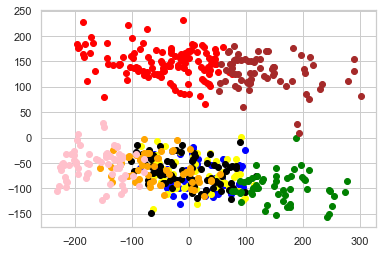

In [370]:
x0 = pca_t[clusters==0]
x1 = pca_t[clusters==1]
x2 = pca_t[clusters==2]
x3 = pca_t[clusters==3]
x4 = pca_t[clusters==4]
x5 = pca_t[clusters==5]
x6 = pca_t[clusters==6]
x7 = pca_t[clusters==7]
plt.scatter(x0[:,0],x0[:,1],color='red')
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='yellow')
plt.scatter(x3[:,0],x3[:,1],color='black')
plt.scatter(x4[:,0],x4[:,1],color='green')
plt.scatter(x5[:,0],x5[:,1],color='brown')
plt.scatter(x6[:,0],x6[:,1],color='orange')
plt.scatter(x7[:,0],x7[:,1],color='pink')
plt.show()

# Model building 2

In [371]:
X_train, X_test, y_train, y_test = train_test_split(df_type2, target_type2, random_state=0)

In [372]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [373]:
clf1 =  SVC(gamma='auto')

In [374]:
clf1.fit(X_train,y_train)

SVC(gamma='auto')

In [375]:
pred = clf1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.32      0.70      0.44        23
           1       0.00      0.00      0.00        10
           2       0.12      0.06      0.08        16
           3       0.77      0.48      0.59        21
           4       0.00      0.00      0.00         8
           5       0.51      0.77      0.61        30
           6       0.50      0.28      0.36        18
           7       0.57      0.57      0.57        14

    accuracy                           0.45       140
   macro avg       0.35      0.36      0.33       140
weighted avg       0.41      0.45      0.40       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [376]:
clf2 =  LogisticRegression(random_state=0)

In [377]:
clf2.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [378]:
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.44      0.65      0.53        23
           1       0.40      0.20      0.27        10
           2       0.27      0.25      0.26        16
           3       0.55      0.52      0.54        21
           4       0.00      0.00      0.00         8
           5       0.68      0.70      0.69        30
           6       0.36      0.28      0.31        18
           7       0.48      0.71      0.57        14

    accuracy                           0.49       140
   macro avg       0.40      0.41      0.40       140
weighted avg       0.45      0.49      0.46       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [379]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':range(1,200,5)}
svc = SVC(gamma='auto')
clf3 = GridSearchCV(svc, parameters)
clf3.fit(X_train,y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': range(1, 200, 5),
                         'kernel': ('linear', 'rbf', 'poly')})

In [380]:
t_4 = clf3.best_params_

In [381]:
parameters = {'C':range(1,100,5)}
lr = LogisticRegression(random_state=0)
clf4 = GridSearchCV(lr, parameters)
clf4.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': range(1, 100, 5)})

In [382]:
t_5 = clf4.best_params_

In [383]:
print(t_4.get('kernel'))
print(t_4.get('C'))

rbf
16


In [384]:
clf5 = SVC(gamma='auto',kernel='rbf',C=16)

In [385]:
clf5.fit(X_train,y_train)

SVC(C=16, gamma='auto')

In [386]:
pred5 = clf5.predict(X_test)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.46      0.83      0.59        23
           1       0.00      0.00      0.00        10
           2       0.25      0.19      0.21        16
           3       0.71      0.57      0.63        21
           4       0.00      0.00      0.00         8
           5       0.64      0.70      0.67        30
           6       0.42      0.44      0.43        18
           7       0.47      0.57      0.52        14

    accuracy                           0.51       140
   macro avg       0.37      0.41      0.38       140
weighted avg       0.45      0.51      0.47       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [387]:
accuracy_data.append(accuracy_score(y_test,pred5))

In [388]:
clf6 =  LogisticRegression(random_state=0,C=t_5.get('C'))

In [389]:
clf6.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=21, random_state=0)

In [390]:
pred6 = clf6.predict(X_test)
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.47      0.65      0.55        23
           1       0.40      0.20      0.27        10
           2       0.29      0.25      0.27        16
           3       0.52      0.52      0.52        21
           4       0.00      0.00      0.00         8
           5       0.68      0.70      0.69        30
           6       0.36      0.28      0.31        18
           7       0.43      0.71      0.54        14

    accuracy                           0.49       140
   macro avg       0.39      0.41      0.39       140
weighted avg       0.45      0.49      0.46       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [391]:
accuracy_data.append(accuracy_score(y_test,pred6))

In [392]:
clf7 = RandomForestClassifier(max_depth=2, random_state=0)

In [393]:
clf7.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [394]:
pred7 = clf7.predict(X_test)
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.20      0.65      0.31        23
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        16
           3       0.62      0.24      0.34        21
           4       0.00      0.00      0.00         8
           5       0.37      0.63      0.46        30
           6       0.00      0.00      0.00        18
           7       0.80      0.29      0.42        14

    accuracy                           0.31       140
   macro avg       0.25      0.23      0.19       140
weighted avg       0.28      0.31      0.24       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [395]:
parameters = {'max_depth':range(1,100,5)}
rf = RandomForestClassifier(max_depth=2, random_state=0)
clf8 = GridSearchCV(rf, parameters)
clf8.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'max_depth': range(1, 100, 5)})

In [396]:
t_6 = clf8.best_params_

In [397]:
clf9 = RandomForestClassifier(max_depth=t_6.get('max_depth'), random_state=0)

In [398]:
clf9.fit(X_train,y_train)

RandomForestClassifier(max_depth=21, random_state=0)

In [399]:
pred9 = clf9.predict(X_test)
print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

           0       0.30      0.61      0.40        23
           1       0.00      0.00      0.00        10
           2       0.22      0.12      0.16        16
           3       0.71      0.57      0.63        21
           4       0.00      0.00      0.00         8
           5       0.58      0.73      0.65        30
           6       0.23      0.17      0.19        18
           7       0.50      0.50      0.50        14

    accuracy                           0.43       140
   macro avg       0.32      0.34      0.32       140
weighted avg       0.38      0.43      0.39       140



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [400]:
accuracy_data.append(accuracy_score(y_test,pred9))

In [401]:
pca = PCA(0.95)
pca_t = pca.fit_transform(df_type2)

In [402]:
n=8

In [403]:
kmeans = KMeans(n_clusters = n,init='random')
clusters = kmeans.fit_predict(pca_t)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [404]:
reference_labels = get_reference_dict(clusters,target_type2)
predicted_labels = get_labels(clusters,reference_labels)
print("Accuracy",100*accuracy_score(predicted_labels,target_type2))
accuracy_data.append(accuracy_score(predicted_labels,target_type2))

Accuracy 25.985663082437277


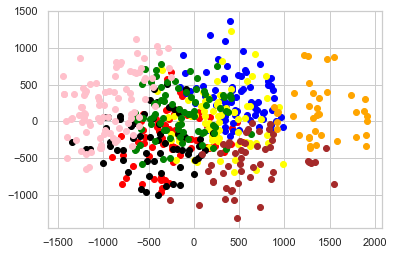

In [405]:
x0 = pca_t[clusters==0]
x1 = pca_t[clusters==1]
x2 = pca_t[clusters==2]
x3 = pca_t[clusters==3]
x4 = pca_t[clusters==4]
x5 = pca_t[clusters==5]
x6 = pca_t[clusters==6]
x7 = pca_t[clusters==7]
plt.scatter(x0[:,0],x0[:,1],color='red')
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='yellow')
plt.scatter(x3[:,0],x3[:,1],color='black')
plt.scatter(x4[:,0],x4[:,1],color='green')
plt.scatter(x5[:,0],x5[:,1],color='brown')
plt.scatter(x6[:,0],x6[:,1],color='orange')
plt.scatter(x7[:,0],x7[:,1],color='pink')
plt.show()

# Model building 3

In [406]:
X_train, X_test, y_train, y_test = train_test_split(df_type3, target_type3, random_state=0)

In [407]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [408]:
clf1 =  SVC(gamma='auto')

In [409]:
clf1.fit(X_train,y_train)

SVC(gamma='auto')

In [410]:
pred = clf1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         1
           5       0.73      1.00      0.85        11
           6       1.00      0.83      0.91         6
           7       0.67      0.57      0.62         7

    accuracy                           0.68        47
   macro avg       0.46      0.50      0.47        47
weighted avg       0.59      0.68      0.61        47



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [411]:
clf2 =  LogisticRegression(random_state=0)

In [412]:
clf2.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [413]:
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       1.00      0.67      0.80         3
           2       0.80      0.80      0.80         5
           3       1.00      0.80      0.89         5
           4       0.50      1.00      0.67         1
           5       1.00      0.91      0.95        11
           6       0.83      0.83      0.83         6
           7       0.86      0.86      0.86         7

    accuracy                           0.85        47
   macro avg       0.84      0.84      0.82        47
weighted avg       0.87      0.85      0.86        47



In [414]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':range(1,200,5)}
svc = SVC(gamma='auto')
clf3 = GridSearchCV(svc, parameters)
clf3.fit(X_train,y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': range(1, 200, 5),
                         'kernel': ('linear', 'rbf', 'poly')})

In [415]:
t_7 = clf3.best_params_

In [416]:
parameters = {'C':range(1,100,5)}
lr = LogisticRegression(random_state=0)
clf4 = GridSearchCV(lr, parameters)
clf4.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': range(1, 100, 5)})

In [417]:
t_8 = clf4.best_params_

In [418]:
t_7.get('kernel')

'linear'

In [419]:
clf5 = SVC(gamma='auto',kernel='linear',C=t_7.get('C'))

In [420]:
clf5.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [421]:
pred5 = clf5.predict(X_test)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.50      0.67      0.57         3
           2       0.43      0.60      0.50         5
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        11
           6       1.00      0.50      0.67         6
           7       0.86      0.86      0.86         7

    accuracy                           0.79        47
   macro avg       0.81      0.76      0.77        47
weighted avg       0.83      0.79      0.79        47



In [422]:
accuracy_data.append(accuracy_score(y_test,pred5))

In [423]:
clf6 =  LogisticRegression(random_state=0,C=t_8.get('C'))

In [424]:
clf6.fit(X_train,y_train)

LogisticRegression(C=11, random_state=0)

In [425]:
pred6 = clf6.predict(X_test)
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.67      0.67      0.67         3
           2       0.80      0.80      0.80         5
           3       1.00      0.80      0.89         5
           4       0.50      1.00      0.67         1
           5       1.00      0.91      0.95        11
           6       0.83      0.83      0.83         6
           7       1.00      0.86      0.92         7

    accuracy                           0.85        47
   macro avg       0.82      0.84      0.82        47
weighted avg       0.87      0.85      0.86        47



In [426]:
accuracy_data.append(accuracy_score(y_test,pred6))

In [427]:
clf7 = RandomForestClassifier(max_depth=2, random_state=0)

In [428]:
clf7.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [429]:
pred7 = clf7.predict(X_test)
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.44      0.78      0.56         9
           1       0.00      0.00      0.00         3
           2       0.40      0.40      0.40         5
           3       0.43      0.60      0.50         5
           4       0.00      0.00      0.00         1
           5       0.69      0.82      0.75        11
           6       0.67      0.33      0.44         6
           7       1.00      0.43      0.60         7

    accuracy                           0.55        47
   macro avg       0.45      0.42      0.41        47
weighted avg       0.57      0.55      0.52        47



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [430]:
parameters = {'max_depth':range(1,100,5)}
rf = RandomForestClassifier(max_depth=2, random_state=0)
clf8 = GridSearchCV(rf, parameters)
clf8.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'max_depth': range(1, 100, 5)})

In [431]:
t_9 = clf8.best_params_

In [432]:
print(t_1.get('max_depth'))

None


In [433]:
clf9 = RandomForestClassifier(max_depth=t_9.get('max_depth'), random_state=0)

In [434]:
clf9.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, random_state=0)

In [435]:
pred9 = clf9.predict(X_test)
print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.00      0.00      0.00         3
           2       0.40      0.40      0.40         5
           3       0.43      0.60      0.50         5
           4       1.00      1.00      1.00         1
           5       1.00      0.82      0.90        11
           6       0.67      0.67      0.67         6
           7       1.00      0.86      0.92         7

    accuracy                           0.70        47
   macro avg       0.64      0.65      0.64        47
weighted avg       0.70      0.70      0.69        47



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [436]:
accuracy_data.append(accuracy_score(y_test,pred9))

In [437]:
pca = PCA(0.95)
pca_t = pca.fit_transform(df_type3)

In [438]:
n = 8
kmeans = KMeans(n_clusters = n,init='random')
clusters = kmeans.fit_predict(pca_t)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


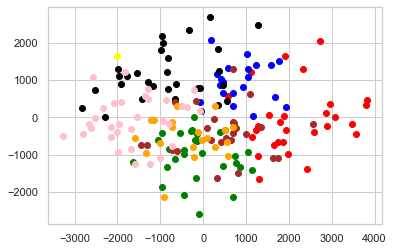

In [439]:
x0 = pca_t[clusters==0]
x1 = pca_t[clusters==1]
x2 = pca_t[clusters==2]
x3 = pca_t[clusters==3]
x4 = pca_t[clusters==4]
x5 = pca_t[clusters==5]
x6 = pca_t[clusters==6]
x7 = pca_t[clusters==7]
plt.scatter(x0[:,0],x0[:,1],color='red')
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='yellow')
plt.scatter(x3[:,0],x3[:,1],color='black')
plt.scatter(x4[:,0],x4[:,1],color='green')
plt.scatter(x5[:,0],x5[:,1],color='brown')
plt.scatter(x6[:,0],x6[:,1],color='orange')
plt.scatter(x7[:,0],x7[:,1],color='pink')
plt.show()

In [440]:
clusters = kmeans.fit_predict(pca_t)
print("Accuracy : ",100*accuracy_score(clusters,target_type3))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy :  18.27956989247312


In [441]:
accuracy_data.append(accuracy_score(clusters,target_type3))

In [442]:
type_data = ['Process1_SVM','Process1_Log','Process1_RF','Process1_Kmeans','Process2_SVM','Process2_Log','Process2_RF','Process2_Kmeans','Process3_SVM','Process3_Log','Process3_RF','Process3_Kmeans']

In [443]:
mytable = PrettyTable(['Category','Accuracy'])
for i in range(12):
    mytable.add_row([type_data[i],accuracy_data[i]])

In [444]:
print(mytable)

+-----------------+---------------------+
|     Category    |       Accuracy      |
+-----------------+---------------------+
|   Process1_SVM  |  0.6642857142857143 |
|   Process1_Log  |  0.5928571428571429 |
|   Process1_RF   |  0.6428571428571429 |
| Process1_Kmeans |  0.2921146953405018 |
|   Process2_SVM  |  0.5071428571428571 |
|   Process2_Log  |  0.4857142857142857 |
|   Process2_RF   | 0.42857142857142855 |
| Process2_Kmeans | 0.25985663082437277 |
|   Process3_SVM  |  0.7872340425531915 |
|   Process3_Log  |  0.851063829787234  |
|   Process3_RF   |  0.7021276595744681 |
| Process3_Kmeans |  0.1827956989247312 |
+-----------------+---------------------+


Text(0.5, 1.0, 'Accuracy Comparison')

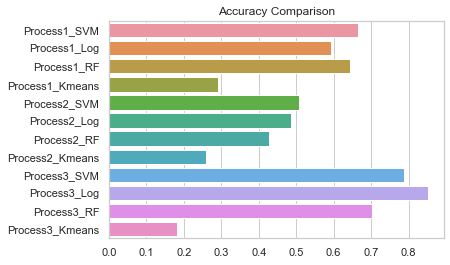

In [445]:
sns.set(style="whitegrid")
sns.barplot(accuracy_data,type_data)
plt.title("Accuracy Comparison")

Text(0.5, 1.0, 'Accuracy Comparison')

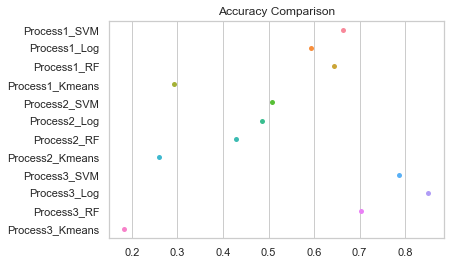

In [446]:
sns.set(style="whitegrid")
sns.swarmplot(x=accuracy_data,y=type_data)
plt.title("Accuracy Comparison")